In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape

(891, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.duplicated().sum()

np.int64(0)

As there are no duplicates thus no need to drop duplicates

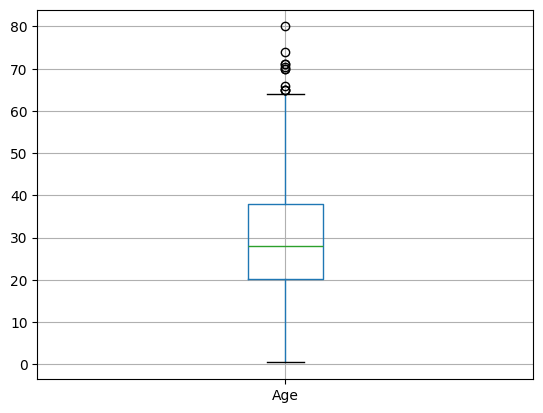

In [6]:
df.boxplot(column=['Age'])
plt.show()

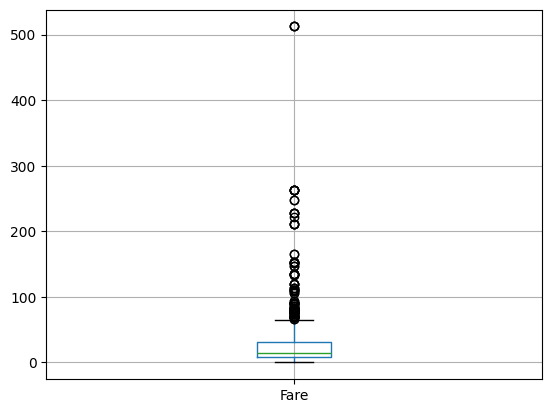

In [7]:
df.boxplot(column=['Fare'])
plt.show()

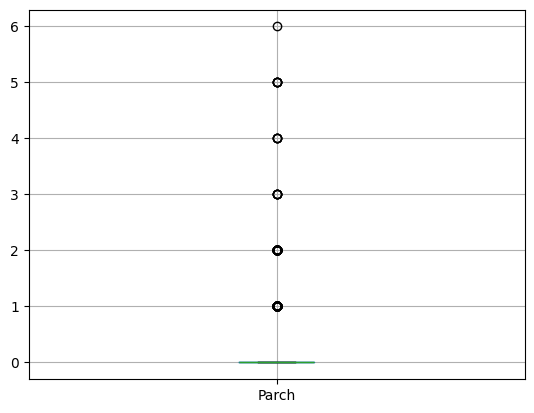

In [8]:
df.boxplot(column=['Parch'])
plt.show()

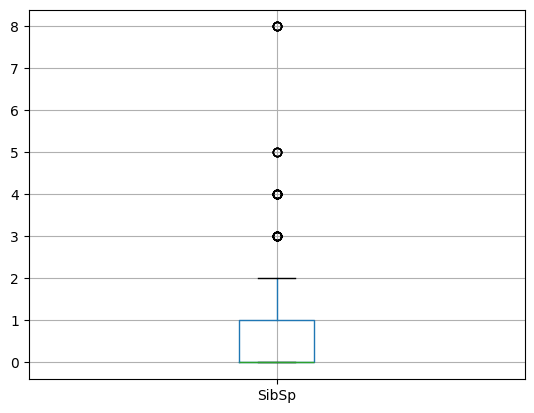

In [9]:
df.boxplot(column=['SibSp'])
plt.show()

In [16]:
def remove_outlier(df, column):
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_range) & (df[column] <= upper_range)]
for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    df = remove_outlier(df, col)



In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

,0
Cabin,object


In [ ]:
mode1=df["Cabin"].mode().iloc[0]
df["Cabin"]=df["Cabin"].fillna(df["Cabin"].mode().iloc[0])

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


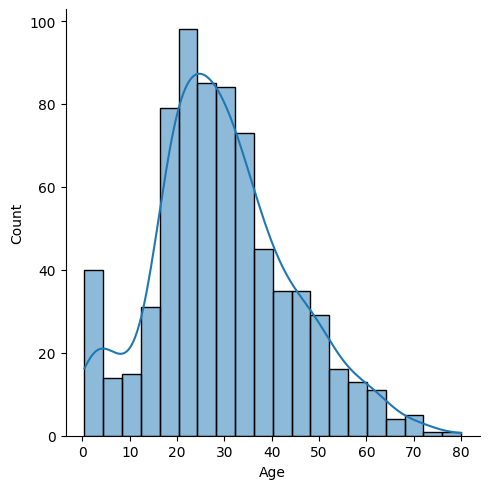

In [ ]:
sns.displot(df['Age'], bins=20, kde=True)
plt.show()

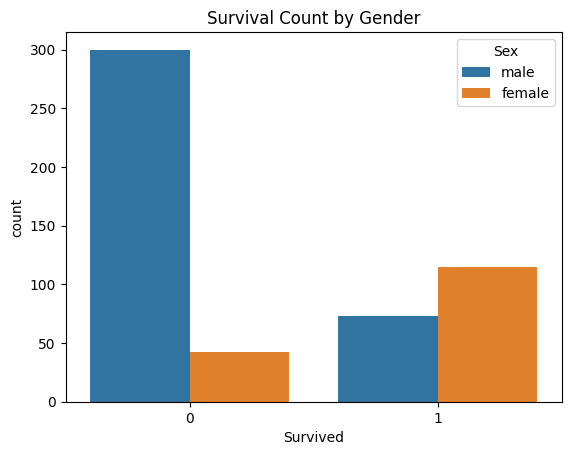

In [ ]:
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival Count by Gender")
plt.show()


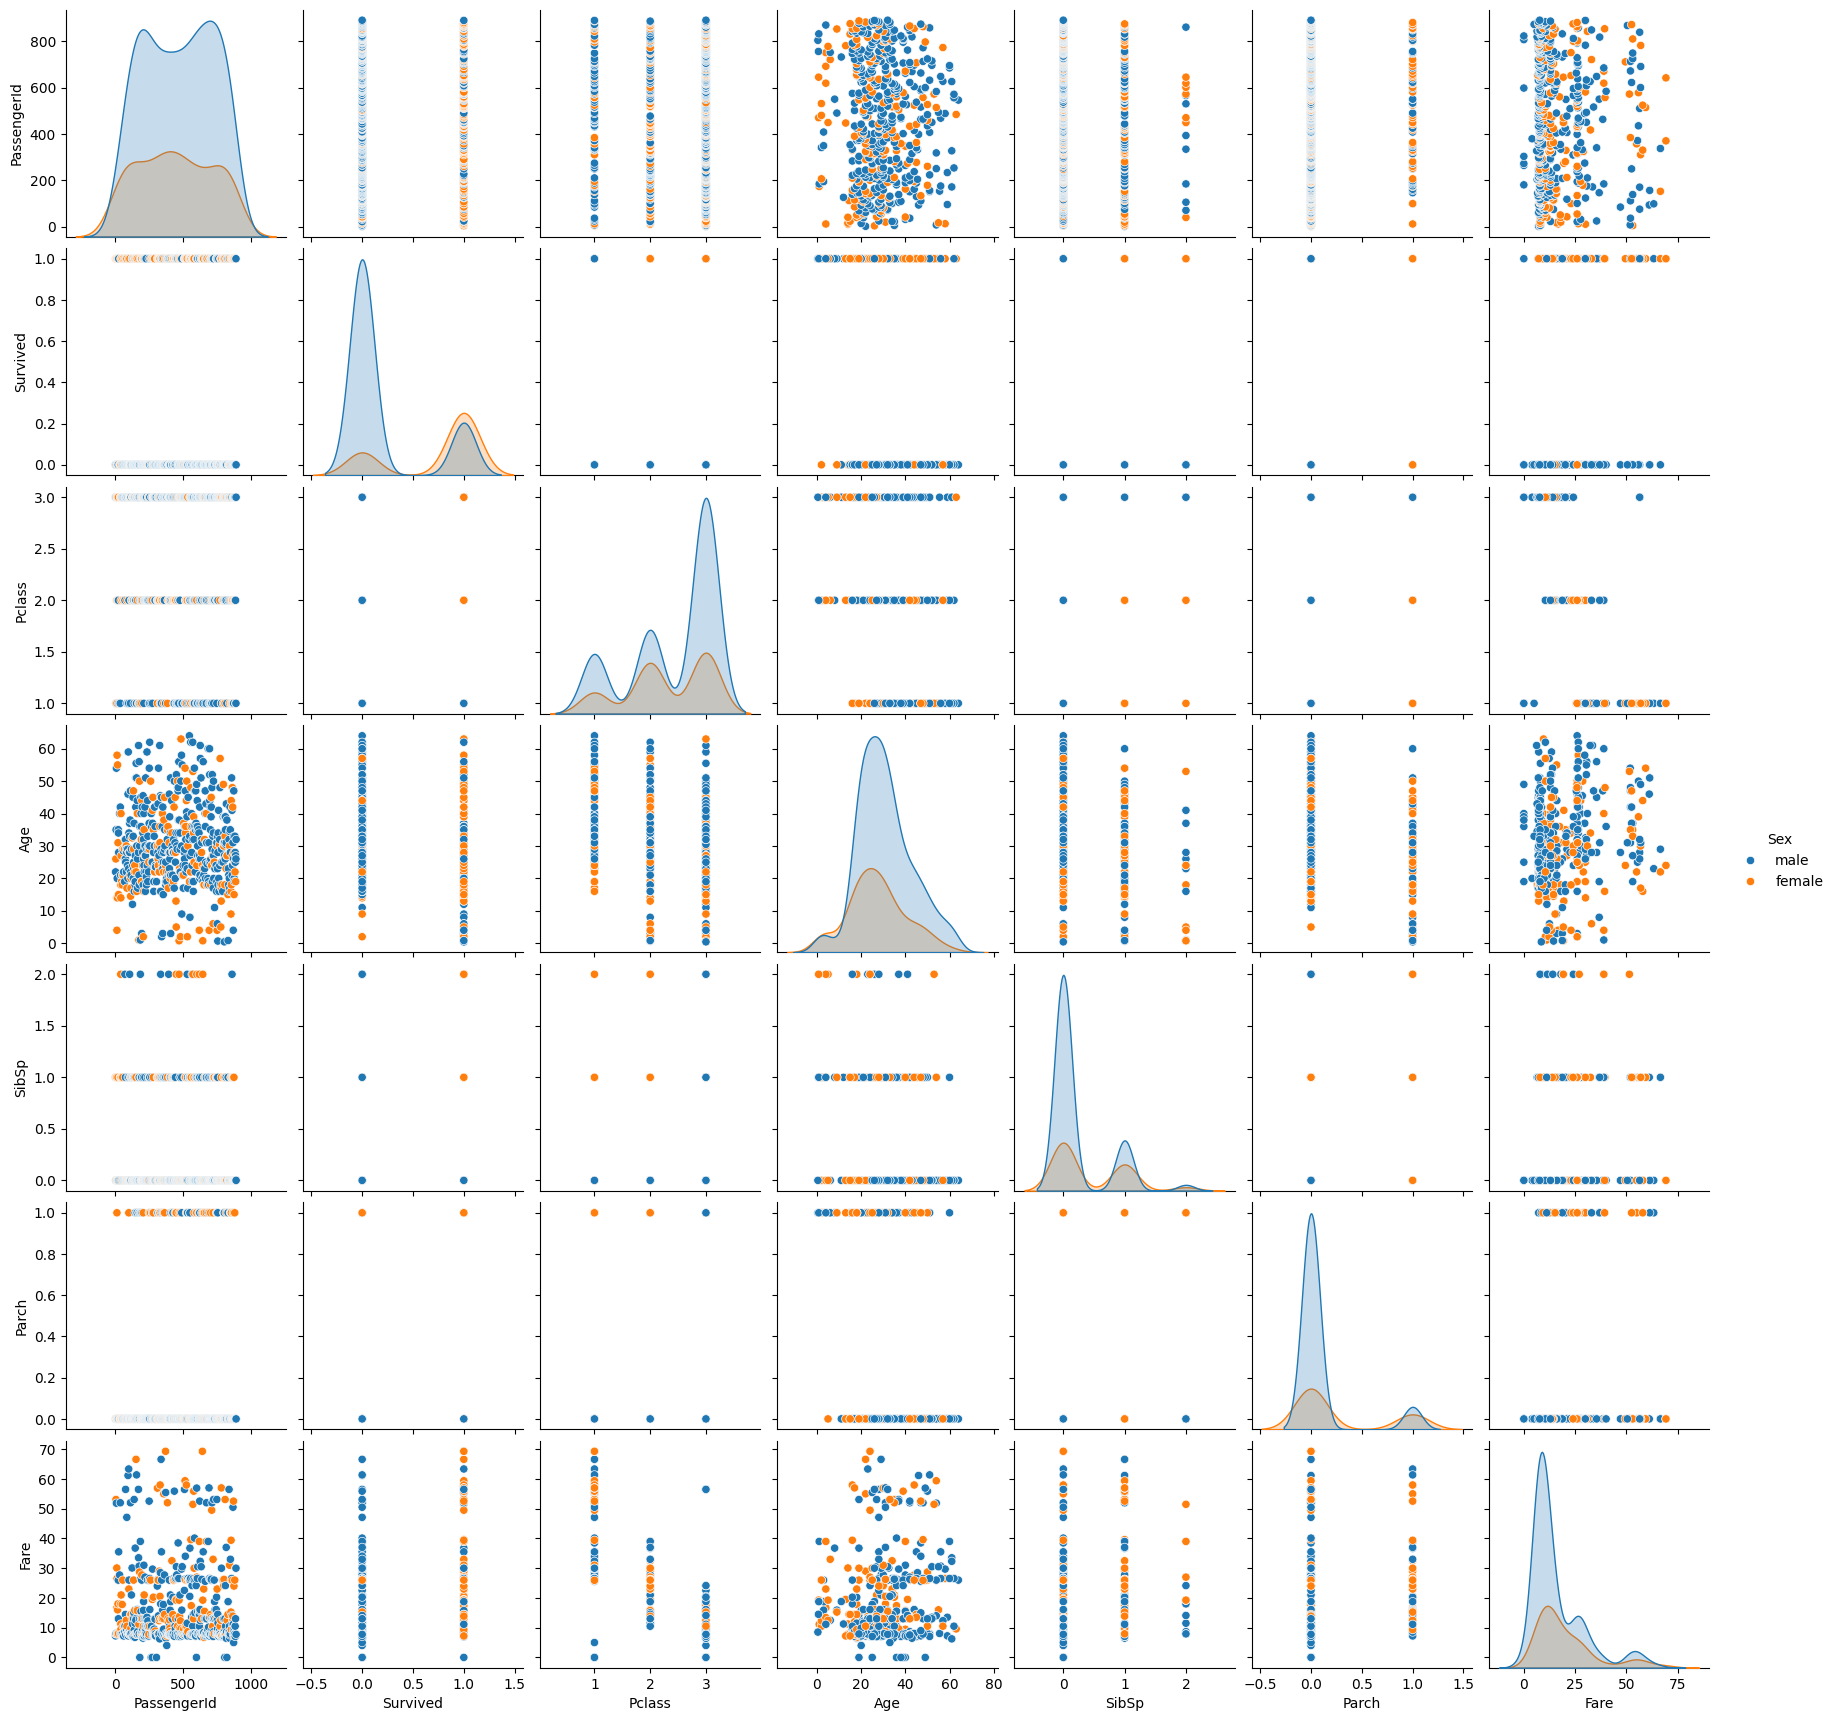

In [ ]:
sns.pairplot(df , hue='Sex')

plt.show()

In [ ]:
df.corr(numeric_only=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.006864,-0.028876,-0.021279,-0.049497,0.060831,-0.009680
Survived,0.006864,1.000000,-0.267787,-0.145667,0.131835,0.231517,0.302429
Pclass,-0.028876,-0.267787,1.000000,-0.377989,-0.058537,-0.023919,-0.724866
Age,-0.021279,-0.145667,-0.377989,1.000000,-0.169946,-0.263803,0.194765
SibSp,-0.049497,0.131835,-0.058537,-0.169946,1.000000,0.376325,0.321722
Parch,0.060831,0.231517,-0.023919,-0.263803,0.376325,1.000000,0.214650
Fare,-0.009680,0.302429,-0.724866,0.194765,0.321722,0.214650,1.000000


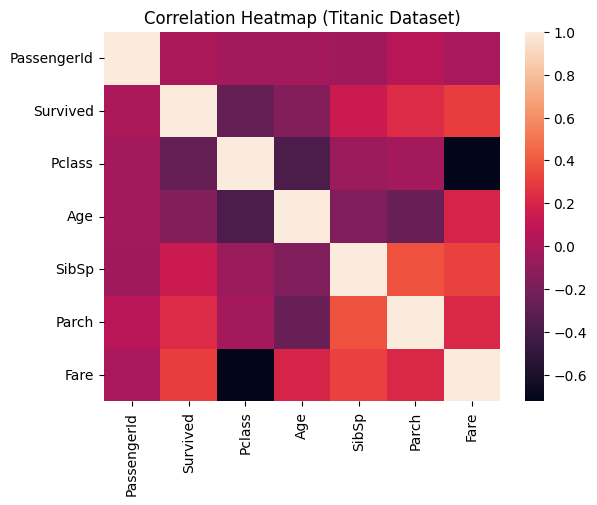

In [ ]:
sns.heatmap(df_corr)
plt.title("Correlation Heatmap (Titanic Dataset)")
plt.show()